# First analysis:

### This notebook will be dedicated to unveil the surfeace insight of the real estate data 

In [157]:
import numpy as np
import pandas as pd
import scipy as sp
from matplotlib import pyplot as plt
import seaborn as sb

In [158]:
df = pd.read_csv("../data/real_estate_28-06-2022_v2.csv")

['departamentos' 'casas' 'sitios' 'parcelas' 'oficinas' 'locales'
 'terrenos' 'industriales' 'agrícolas' 'bodegas' 'otros inmuebles'
 'estacionamientos' 'loteos' 'lotes de cementerio']


<AxesSubplot:>

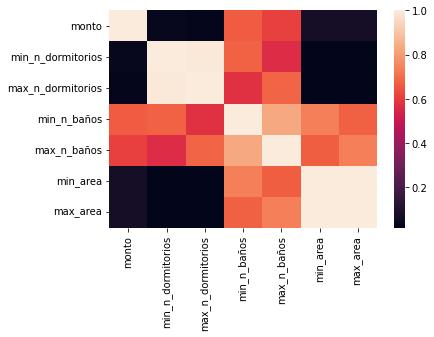

In [159]:
print(df["propiedad"].unique())
df = df.loc[df["oferta"]=="venta",:]
corr = df.loc[df["propiedad"]=="casas",:].corr()
sb.heatmap(corr)

In [160]:
ha_mask = df["unidad_medida"] == "ha"
df.loc[ha_mask, "area_m2"] = df.loc[ha_mask, "min_area"] * 10000
df.loc[[not ha for ha in ha_mask], "area_m2"] = df.loc[[not ha for ha in ha_mask], "min_area"] 
df.loc[ha_mask,"area_m2"]

4038         30000.0
4041         30000.0
4055        510000.0
4059      11450000.0
4076     105450000.0
            ...     
19906      5000000.0
19910     50000000.0
19911     50000000.0
19912     50000000.0
19913        20000.0
Name: area_m2, Length: 881, dtype: float64

In [161]:
# Gives the mean of each numerical value in this case I'm interested in price per squared meter. 
# The Dataframe is grouped by comuna and only "casas" are selected as the propertie feature.

df.loc[df["moneda"]=="$", "UF"] = df.loc[df["moneda"]=="$", "monto"] * 1/33165 # 33.165 CLP x UF | 06-07-2022
df.loc[df["moneda"]=="u$s", "UF"] = df.loc[df["moneda"]=="u$s", "monto"] * 976.65 / 33165 # 976.65 CLP x USD | 06-07-2022
df.loc[df["moneda"]=="uf", "UF"] = df.loc[df["moneda"]=="uf", "monto"]
df["UF_m2"] = df["UF"] / df["area_m2"] # UF per squared meter
price_sqm = df.loc[df["propiedad"]=="terrenos",:].groupby(by=["comuna"], as_index=False).mean()

Merging with communes dataset to compare by region.

In [162]:
comm_df = pd.read_csv("../data/communes_of_chile.csv")

In [163]:
# Here I'm interested in the specifical reagion of each commune, so I can plot the together as a hue value.
beauty = price_sqm.merge(right=comm_df.drop(columns=["provincia", "cut"]))
beauty = beauty.loc[beauty["región"] != "tarapacá",:]

<AxesSubplot:xlabel='región', ylabel='UF_m2'>

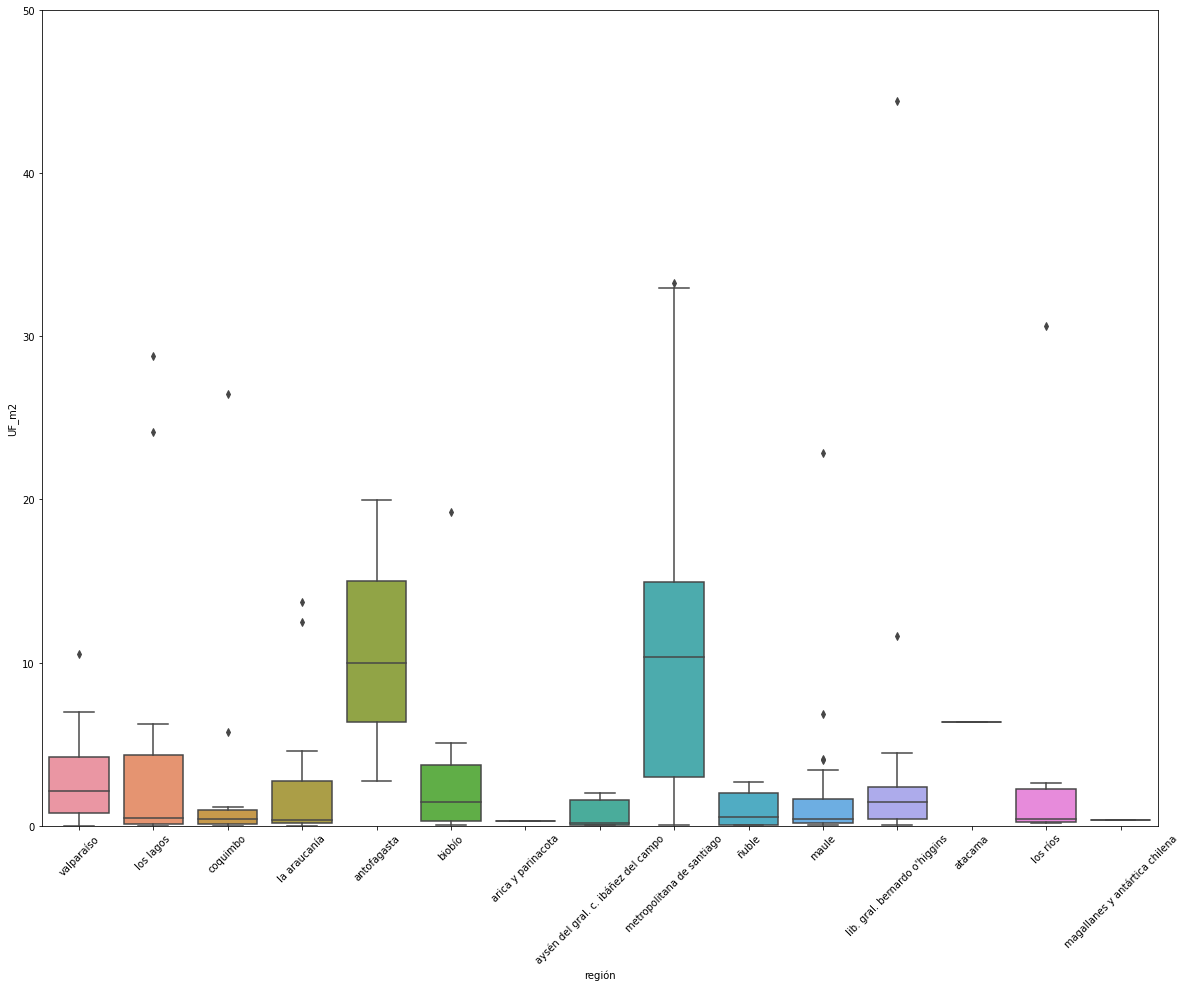

In [164]:
fig, ax = plt.subplots(1 , figsize=(20,15))
ax.tick_params(axis='x', rotation=45)
ax.set_ylim([0,50])
sb.boxplot(data=beauty, x="región", y="UF_m2", ax=ax)

Now, I'll be focusing in a particular region. In this next code box, we'll be studying 'Los Lagos' region.

<AxesSubplot:xlabel='comuna', ylabel='UF_m2'>

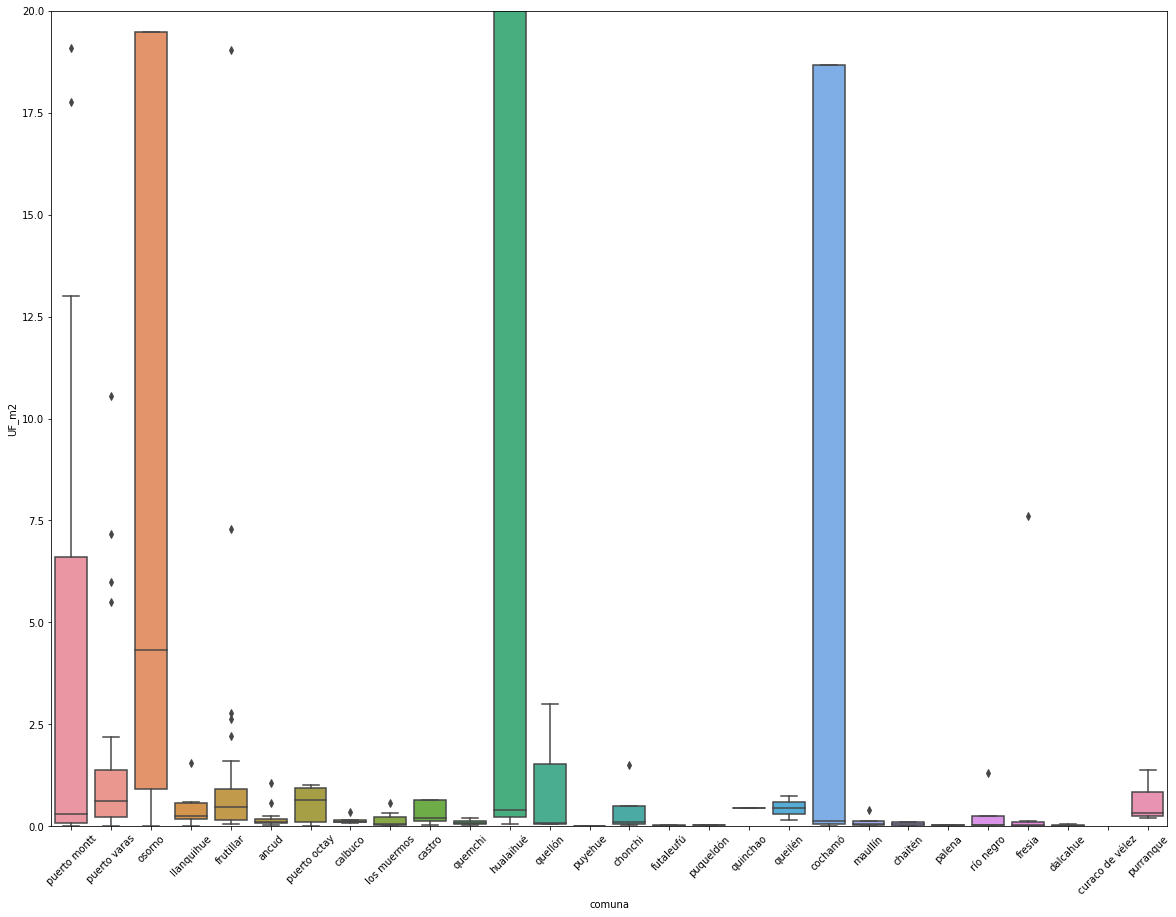

In [168]:
# Only 'ventas' or sells, merge with communes dataset to identify regions. In the third row next, propperties of interest are displayed.
comm_merge = df.merge(comm_df)
sells_mask = np.all([comm_merge["región"]=="los lagos", \
    np.any([comm_merge["propiedad"]=="terrenos",comm_merge["propiedad"]=="terrenos"], axis=0)], \
        axis=0)

fig, ax = plt.subplots(1 , figsize=(20,15))
ax.tick_params(axis='x', rotation=45)
ax.set_ylim([0,20])

loslagos = comm_merge.loc[sells_mask, :]
sb.boxplot(data=loslagos, x="comuna", y="UF_m2", ax=ax)

In [166]:
loslagos.loc[loslagos["comuna"]=="frutillar",:]

,oferta,propiedad,monto,moneda,direccion,inmobiliaria,comentario,comuna,unidad_medida,min_n_dormitorios,...,UF_m2,cut,provincia,región,superficie(km²),población2020,densidad(hab./km²),idh 2005,latitud,longitud
14631,venta,terrenos,2100,uf,"r2q8+hw frutillar, chile, frutillar",NaN,parcela de media ha en parcelación consolidada...,frutillar,NaN,NaN,...,NaN,10105,llanquihue,los lagos,8314.0,20223,24.3,0.669,"-41°7'1.2""","-73°5'60"""
14632,venta,terrenos,38500000,$,"parcelas en frutillar, frutillar",NaN,terreno construccion en venta en frutillar,frutillar,m²,NaN,...,0.232172,10105,llanquihue,los lagos,8314.0,20223,24.3,0.669,"-41°7'1.2""","-73°5'60"""
14633,venta,terrenos,2232,uf,parcelas urbanizadas a 2 minutos de frutillar ...,NaN,terreno construccion en venta en frutillar,frutillar,m²,NaN,...,0.446400,10105,llanquihue,los lagos,8314.0,20223,24.3,0.669,"-41°7'1.2""","-73°5'60"""
14634,venta,terrenos,21990000,$,parcelas frutillar sector paraguay lanzamiento...,NaN,terreno construccion en venta en frutillar,frutillar,m²,NaN,...,0.132610,10105,llanquihue,los lagos,8314.0,20223,24.3,0.669,"-41°7'1.2""","-73°5'60"""
14635,venta,terrenos,29990000,$,"parcelas a 13 minutos de frutillar, frutillar",NaN,terreno construccion en venta en frutillar,frutillar,m²,NaN,...,0.180853,10105,llanquihue,los lagos,8314.0,20223,24.3,0.669,"-41°7'1.2""","-73°5'60"""
14636,venta,terrenos,29990000,$,"parcelas a 15 min de frutillar proximamente, f...",NaN,terreno construccion en venta en frutillar,frutillar,m²,NaN,...,0.180853,10105,llanquihue,los lagos,8314.0,20223,24.3,0.669,"-41°7'1.2""","-73°5'60"""
14637,venta,terrenos,15500,uf,"frutilar alto, frutillar",NaN,terreno construccion en venta en frutillar,frutillar,NaN,NaN,...,NaN,10105,llanquihue,los lagos,8314.0,20223,24.3,0.669,"-41°7'1.2""","-73°5'60"""
14638,venta,terrenos,24990000,$,"frutillar, chile, frutillar alto, frutillar",NaN,parcela plana orilla de carretera en frutilla...,frutillar,m²,NaN,...,0.150701,10105,llanquihue,los lagos,8314.0,20223,24.3,0.669,"-41°7'1.2""","-73°5'60"""
14639,venta,terrenos,24990000,$,"v-120, paraguay, frutillar, los lagos, chile, ...",NaN,parcela plana en frutillar orilla carretera ru...,frutillar,m²,NaN,...,0.150701,10105,llanquihue,los lagos,8314.0,20223,24.3,0.669,"-41°7'1.2""","-73°5'60"""
14640,venta,terrenos,12500,uf,casa soñada en frutillar con acceso al lago/ c...,NaN,terreno construcción en venta en frutillar - a...,frutillar,m²,2.0,...,2.200704,10105,llanquihue,los lagos,8314.0,20223,24.3,0.669,"-41°7'1.2""","-73°5'60"""
